In [4]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [5]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [6]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

In [7]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [8]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [9]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [13]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

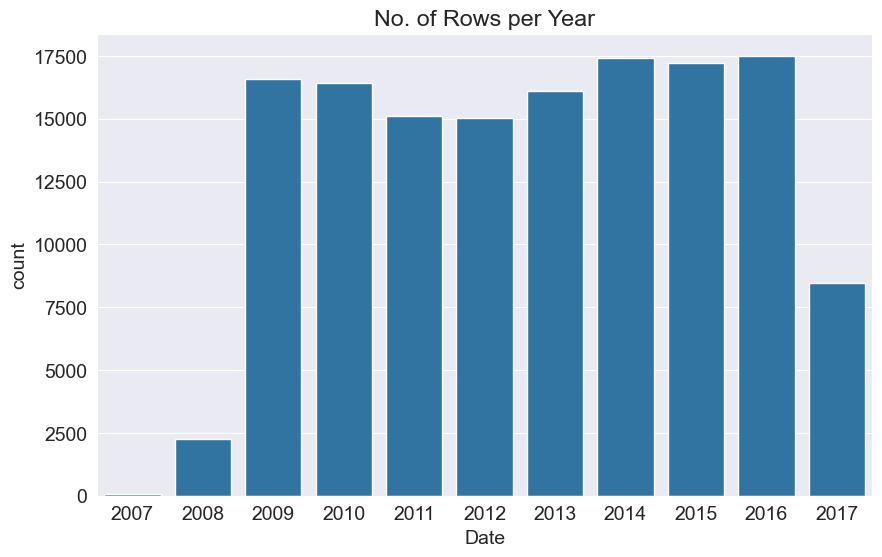

In [14]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [15]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [16]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [17]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [18]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [19]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [20]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [21]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [22]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [23]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


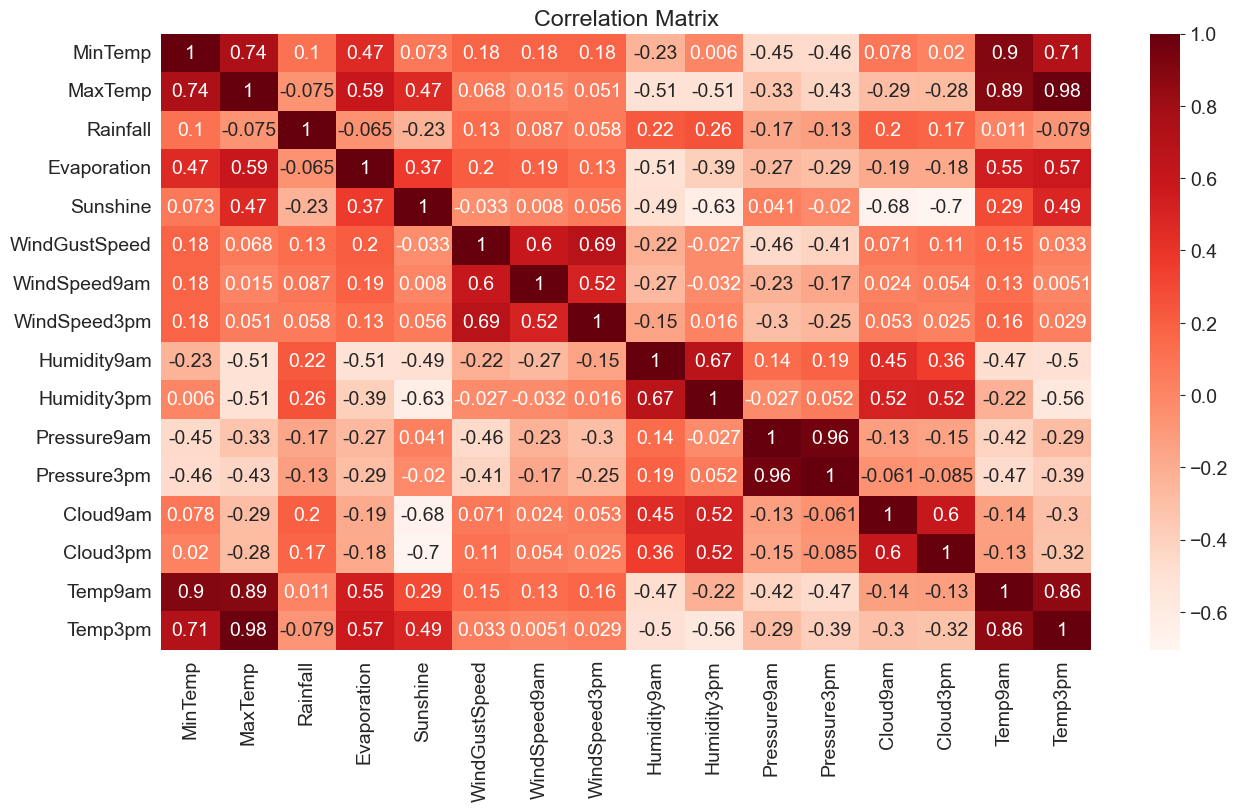

In [24]:
numeric_df=raw_df[numeric_cols]
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');



In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [27]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [28]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [31]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [32]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

In [33]:
test_inputs[categorical_cols].isna().sum()

Location          0
WindGustDir    1460
WindDir9am     1576
WindDir3pm     1228
RainToday       264
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder
train_inputs[categorical_cols]=train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols]=val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols]=test_inputs[categorical_cols].fillna('Unknown')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [35]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [36]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [37]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [38]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037723  0.525852   
1        Albury  0.375000  0.565217  0.000000     0.037723  0.525852   
2        Albury  0.504717  0.576560  0.000000     0.037723  0.525852   
3        Albury  0.417453  0.620038  0.000000     0.037723  0.525852   
4        Albury  0.613208  0.701323  0.002695     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037723  0.525852   
144549    Uluru  0.556604  0.786389  0.000000     0.037723  0.525852   
144550    Uluru  0.608491  0.805293  0.000000     0.037723  0.525852   
144551    Uluru  0.674528  0.818526  0.000000     0.037723  0.525852   
144552    Uluru  0.731132  0.839319  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W       0.294574          W        WNW      0.153846   
1              WNW       0.294574        NNW        WSW      0.030769   
2              WSW       0.310078          W        WSW      0.146154   
3               NE       0.139535         SE          E      0.084615   
4                W       0.271318        ENE         NW      0.053846   
...            ...            ...        ...        ...           ...   
144548         SSE       0.286822        ESE        SSE      0.184615   
144549          NE       0.193798        ENE         SW      0.146154   
144550         ESE       0.255814        ESE        SSE      0.200000   
144551         ESE       0.286822        ESE        SSW      0.215385   
144552         WNW       0.542636        ENE        SSW      0.230769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.275862         0.71         0.22     0.449587       0.4800   
1           0.252874         0.44         0.25     0.497521       0.4912   
2           0.298851         0.38         0.30     0.447934       0.5056   
3           0.103448         0.45         0.16     0.613223       0.5712   
4           0.229885         0.82         0.33     0.500826       0.4624   
...              ...          ...          ...          ...          ...   
144548      0.298851         0.22         0.13     0.555372       0.5232   
144549      0.229885         0.16         0.08     0.530579       0.4880   
144550      0.103448         0.15         0.08     0.519008       0.4944   
144551      0.195402         0.22         0.09     0.553719       0.5136   
144552      0.149425         0.16         0.09     0.522314       0.4656   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
0       0.888889  0.500352  0.508439  0.522073        No                0.0   
1       0.493021  0.500352  0.514768  0.570058        No                0.0   
2       0.493021  0.222222  0.594937  0.548944        No                0.0   
3       0.493021  0.500352  0.533755  0.612284        No                0.0   
4       0.777778  0.888889  0.527426  0.673704        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144548  0.493021  0.500352  0.651899  0.714012        No                0.0   
144549  0.493021  0.500352  0.761603  0.771593        No                0.0   
144550  0.493021  0.500352  0.778481  0.788868        No                0.0   
144551  0.493021  0.500352  0.780591  0.817658        No                0.0   
144552  0.493021  0.500352  0.786920  0.821497        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                   0.0              1.0                    0.0   
1                   0.0              1.0                    0.0   
2                   0.0              1.0                    0.0   
3                   0.0              1.0                    0.0   
4                   0.0              1.0                    0.0   
.

In [39]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093    Unknown        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.493021  0.500352  0.350211  0.504798        No                0.0   
145455  0.493021  0.500352  0.364979  0.533589        No                0.0   
145456  0.493021  0.500352  0.381857  0.573896        No                0.0   
145457  0.493021  0.500352  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [40]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [41]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [43]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 2.44 s
Wall time: 7.51 s


DecisionTreeClassifier(random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
train_preds = model.predict(X_train)

In [46]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [47]:
pd.value_counts(train_preds)

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [48]:
train_probs = model.predict_proba(X_train)

In [49]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [50]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [51]:
model.score(X_val, val_targets)

0.7928152747954268

In [52]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

In [53]:
from sklearn.tree import plot_tree, export_text

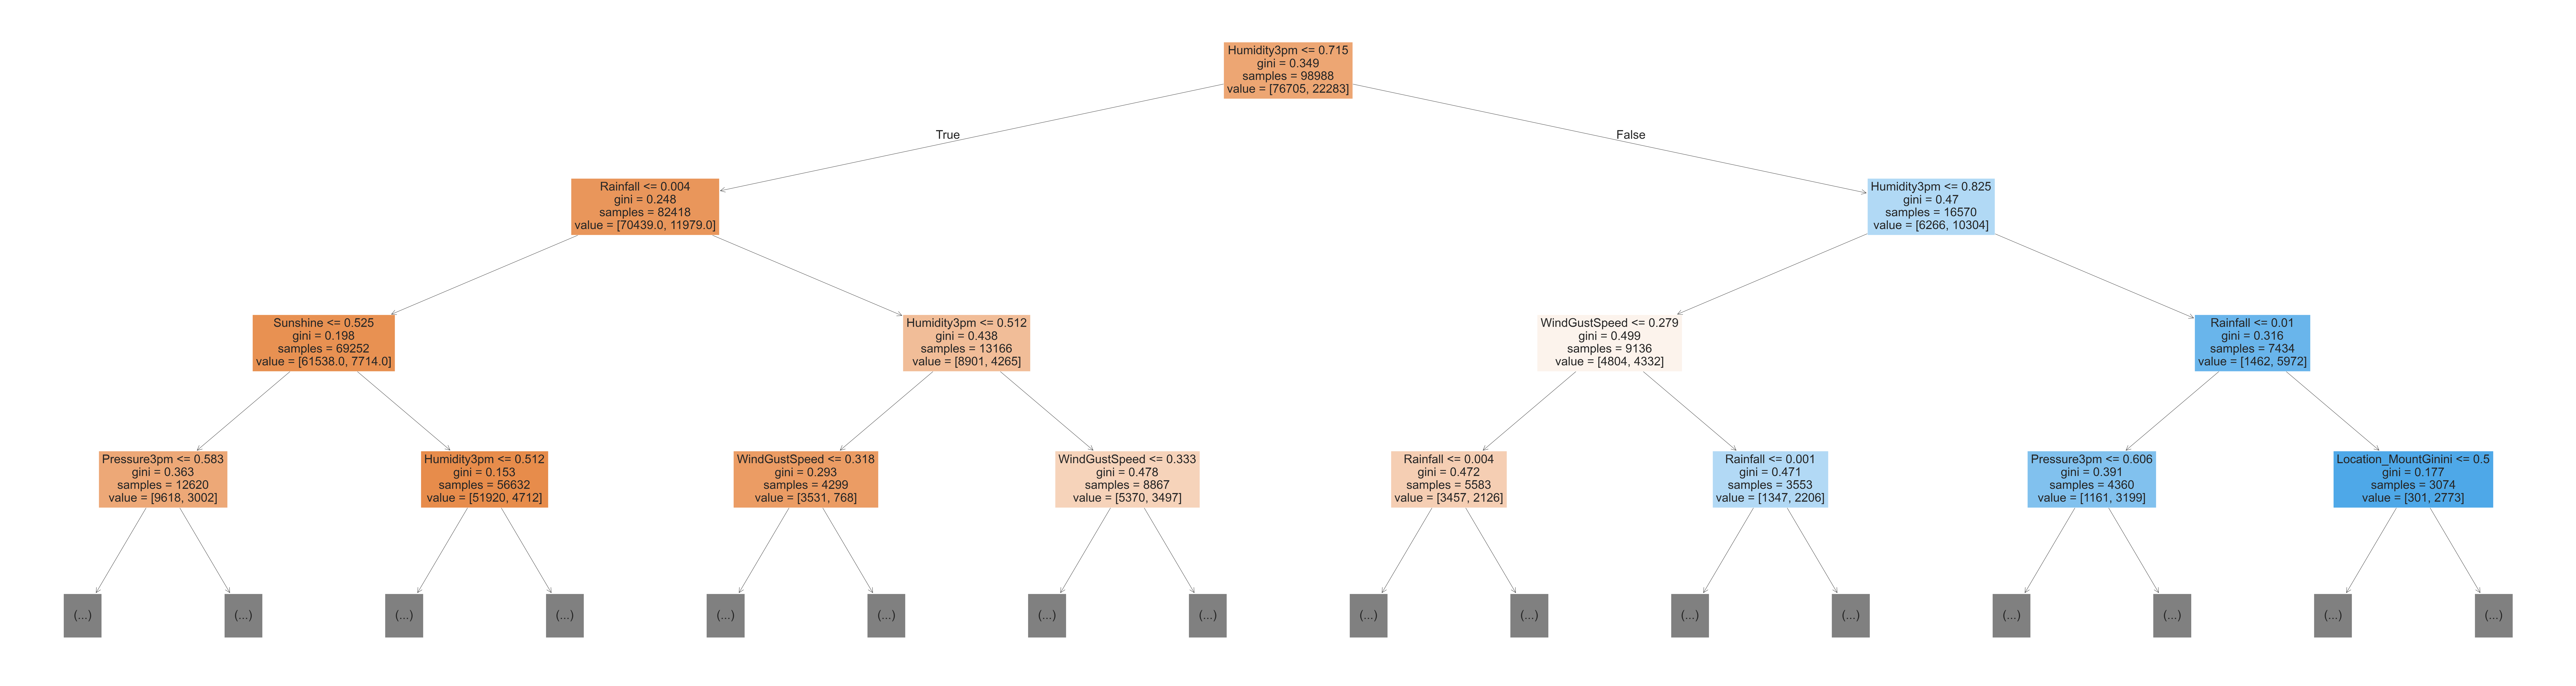

In [54]:
plt.figure(figsize=(150,40))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);

In [55]:
model.tree_.max_depth

48

In [56]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- truncated branch of depth 36
|   |   |--- Sunshine >  0.52
|   |   |   |--- truncated branch of depth 46
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- truncated branch of depth 28
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- truncated branch of depth 35
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- truncated branch of depth 43
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- truncated branch of depth 26
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- truncated branch of depth 27
|   |   |--- Rainfall >  0.01
|   |   |   |--- truncated branch of depth 24



In [57]:
model.feature_importances_

array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

In [58]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [59]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261666
11    Pressure3pm    0.062909
2        Rainfall    0.059698
5   WindGustSpeed    0.055278
4        Sunshine    0.049697
8     Humidity9am    0.039776
0         MinTemp    0.034395
14        Temp9am    0.033930
10    Pressure9am    0.033880
1         MaxTemp    0.032072

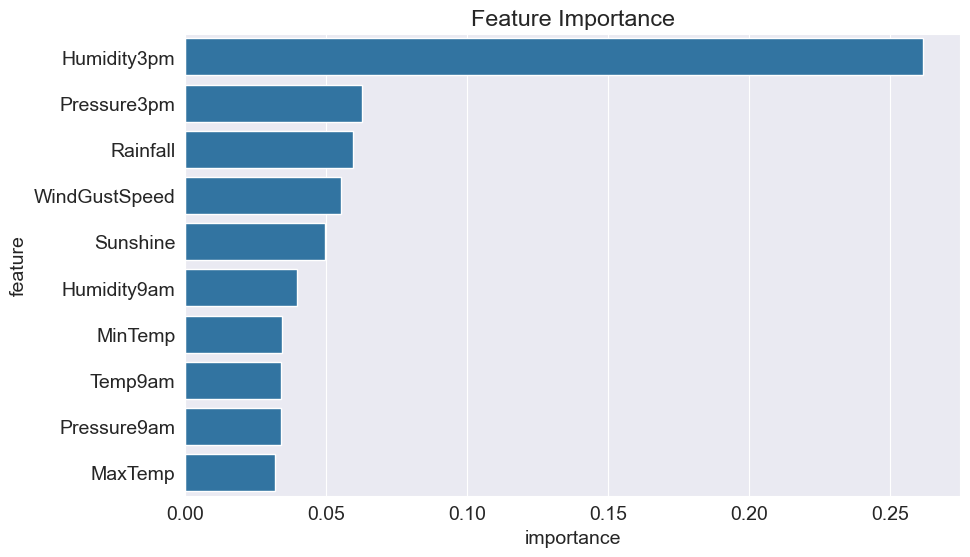

In [60]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [61]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
model.score(X_train, train_targets)

0.8291308037337859

In [63]:
model.score(X_val, val_targets)

0.8334397307178921

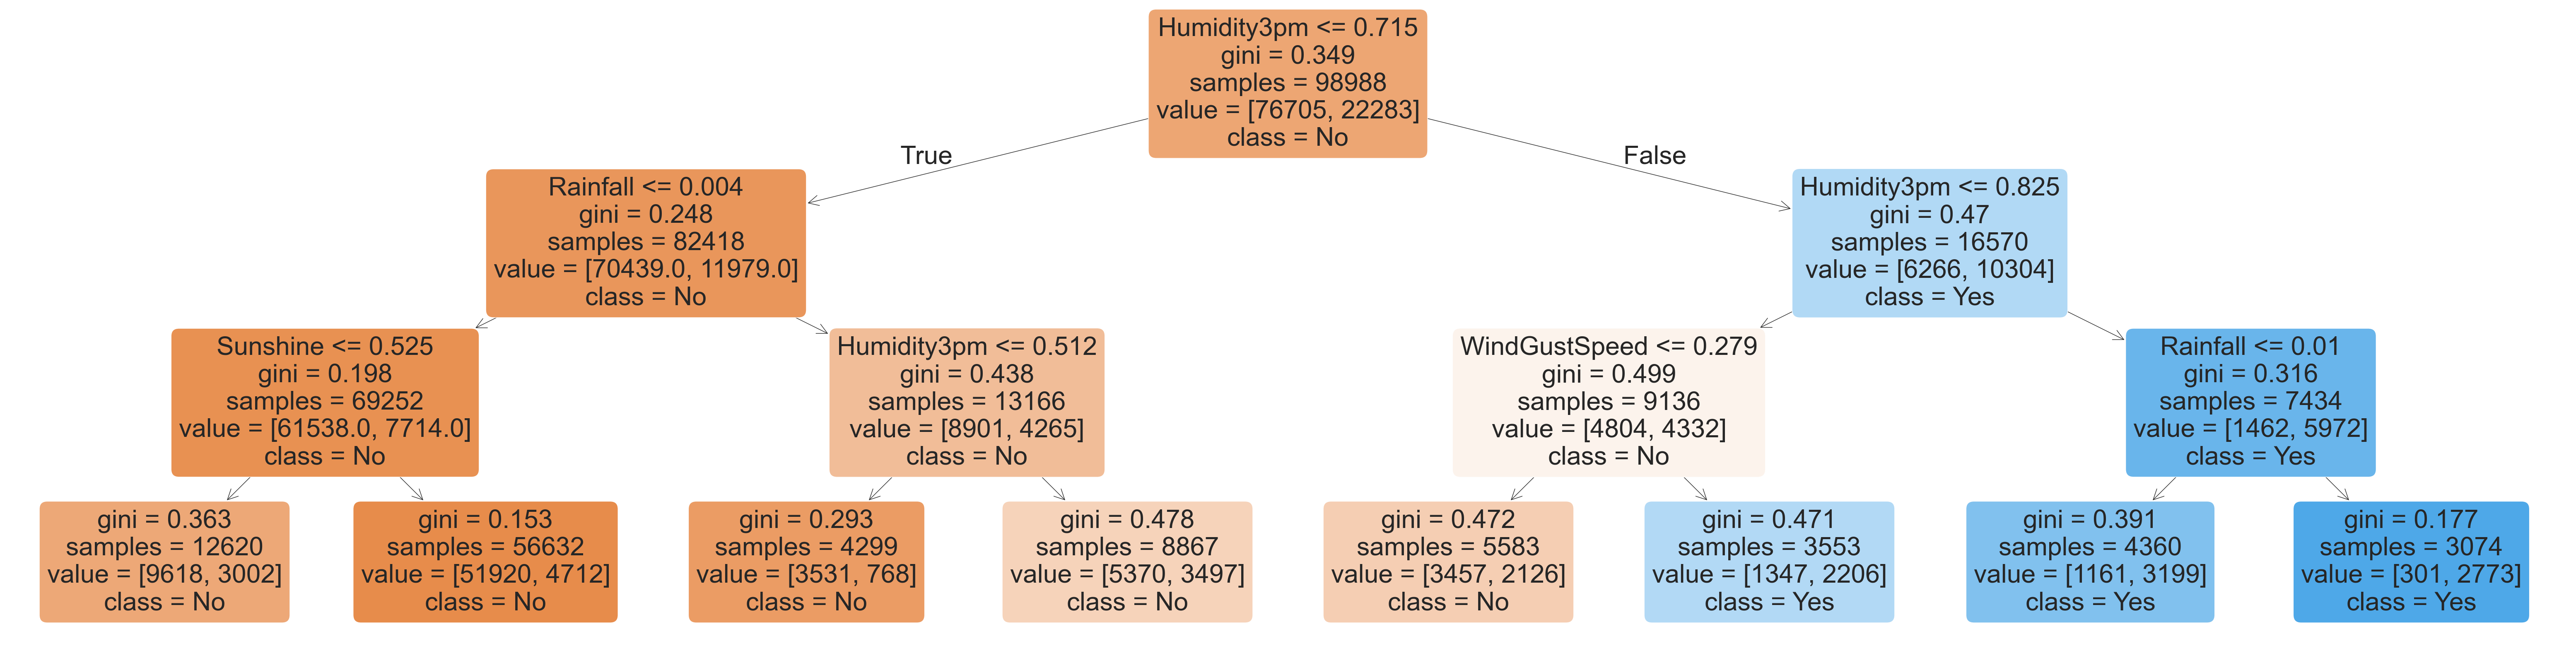

In [64]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [65]:
tree_text = export_text(model, max_depth=3, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [66]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [67]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 30.1 s
Wall time: 1min 38s


In [68]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.157739
8           9        0.140916          0.156578
9          10        0.132966          0.157565
10         11        0.123247          0.159248
11         12        0.113448          0.161221
12         13        0.101861          0.165400
13         14        0.090021          0.166270
14         15        0.078969          0.172538
15         16        0.068291          0.175207
16         17        0.058381          0.176716
17         18        0.048713          0.181591
18         19        0.039914          0.186524
19         20        0.032226          0.188091

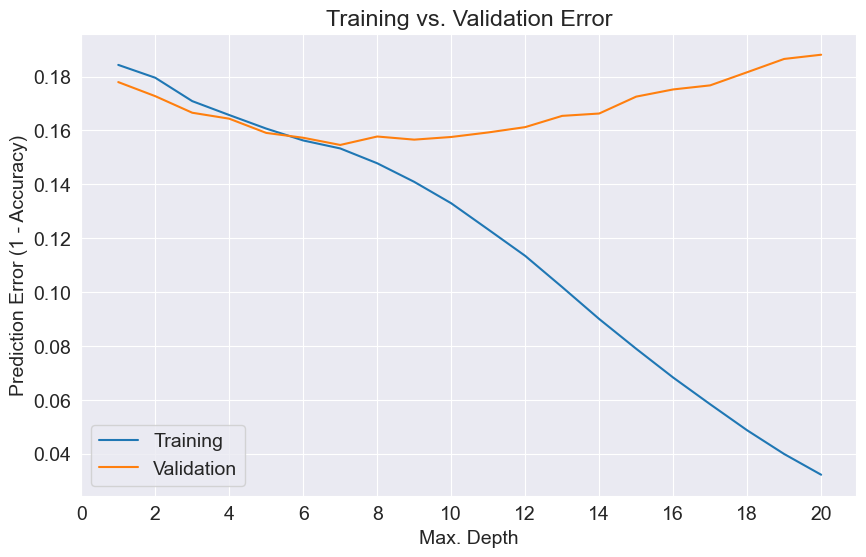

In [69]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [70]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [71]:
model.score(X_train, train_targets)

0.8466884874934335

In [72]:
model.score(X_val, val_targets)

0.8453949277465034

In [73]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [74]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [75]:
model.score(X_train, train_targets)

0.8480421869317493

In [76]:
model.score(X_val, val_targets)

0.8442342290058615

In [77]:
model.tree_.max_depth

12

In [78]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [79]:


from sklearn.ensemble import RandomForestClassifier

In [80]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [81]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 1min 2s
Wall time: 13.5 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [82]:
model.score(X_train,train_targets)

0.9999595910615429

In [83]:
model.score(X_val,val_targets)

0.8559572862863444

In [84]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [85]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

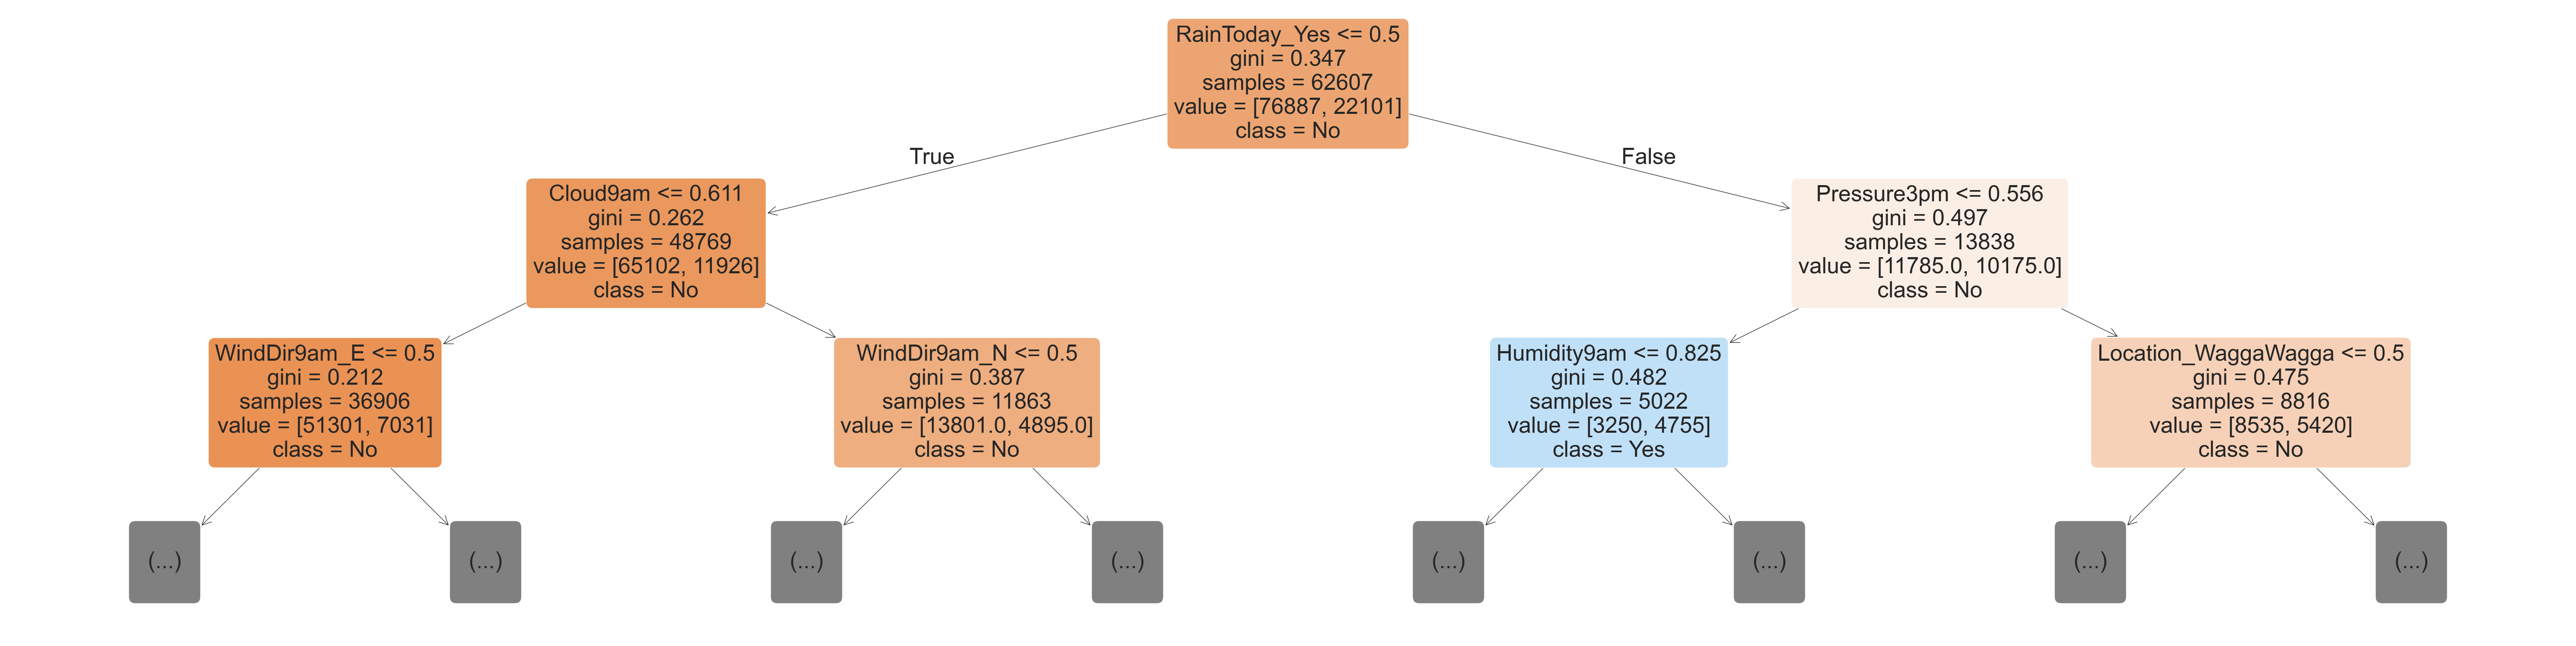

In [86]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

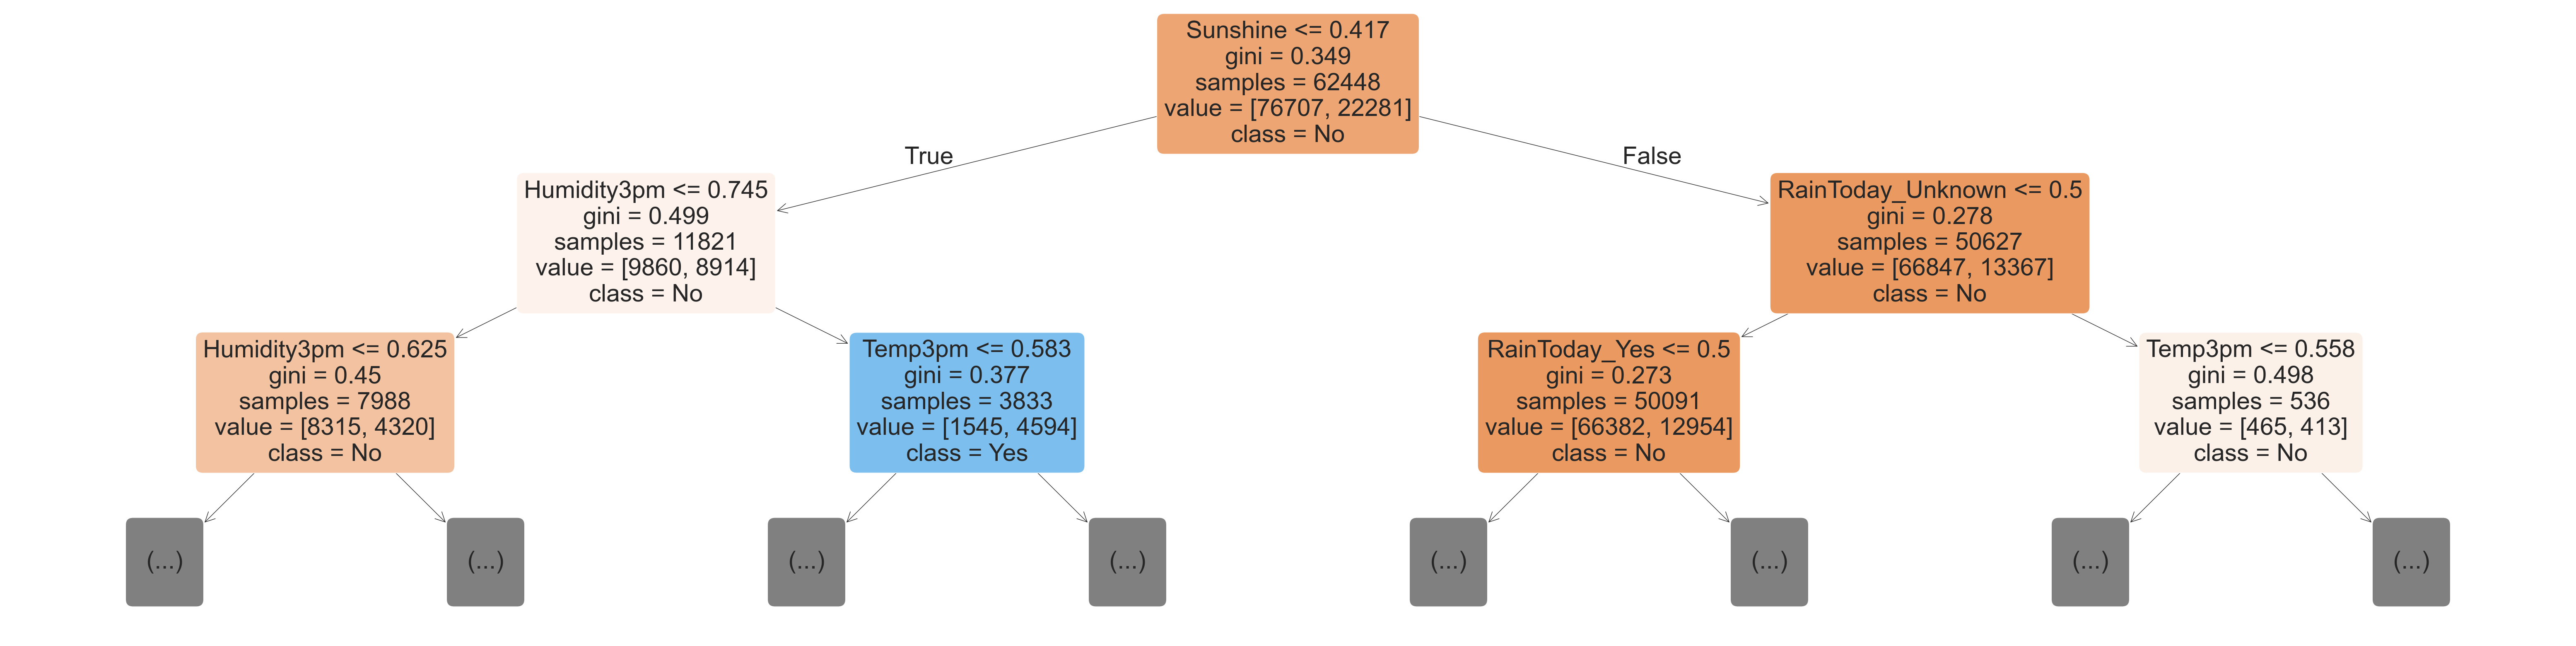

In [87]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [88]:
len(model.estimators_)

100

In [89]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [90]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.133176
4        Sunshine    0.055553
11    Pressure3pm    0.052976
2        Rainfall    0.050488
10    Pressure9am    0.049379
8     Humidity9am    0.049261
5   WindGustSpeed    0.046640
15        Temp3pm    0.045179
1         MaxTemp    0.042172
0         MinTemp    0.041549

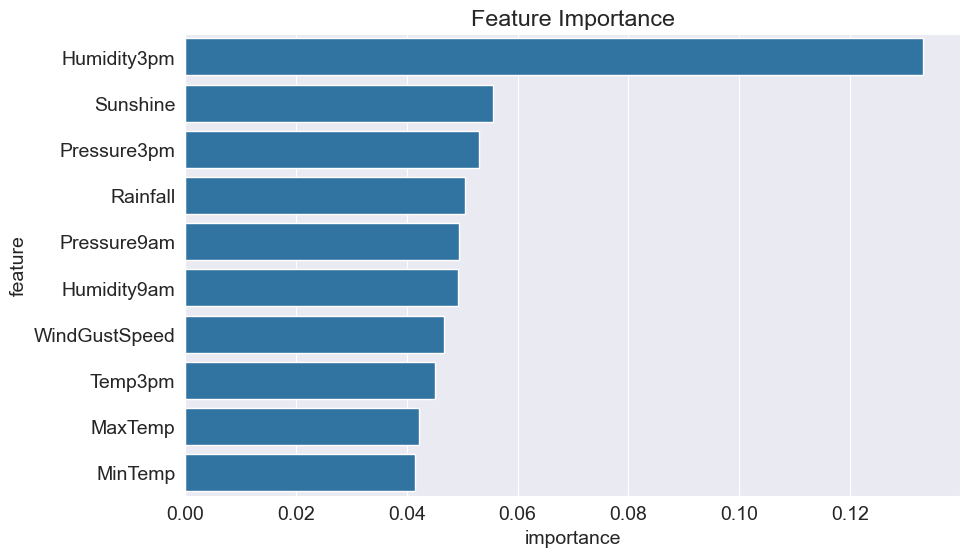

In [91]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [92]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [93]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [94]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8559572862863444)

In [108]:
%%time
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
model.fit(X_train, train_targets)

CPU times: total: 1min 32s
Wall time: 14.7 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [109]:
model.score(X_train, train_targets)

0.9999595910615429

In [110]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [111]:
def max_depth_error(md):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=md)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [117]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])
errors_df

CPU times: total: 2min 14s
Wall time: 58.4 s


Max Depth  Training Error  Validation Error
0           1        0.081141          0.214381
1           2        0.076231          0.179966
2           3        0.035115          0.177065
3           4        0.040783          0.167373
4           5        0.020053          0.165574
5           6        0.025165          0.161279
6           7        0.013274          0.159306
7           8        0.017770          0.159596
8           9        0.009688          0.156810
9          10        0.012648          0.155824
10         11        0.007425          0.154431
11         12        0.010042          0.153096
12         13        0.005556          0.154199
13         14        0.007839          0.153909
14         15        0.004546          0.151994
15         16        0.006092          0.151935
16         17        0.003606          0.150891
17         18        0.005001          0.151587
18         19        0.003041          0.148860

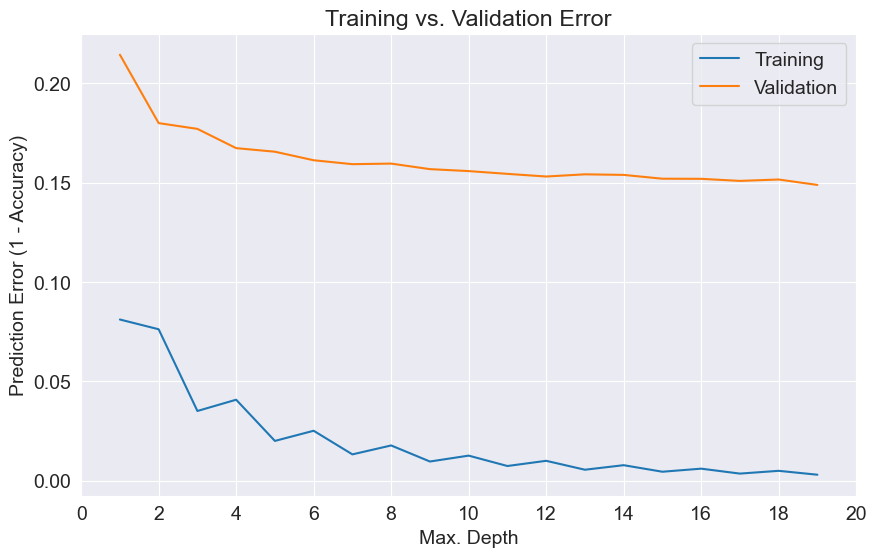

In [118]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [119]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [120]:
test_params(max_depth=5)

(0.821847092576878, 0.8262433985259126)

In [121]:
test_params(max_depth=26)

(0.9820685335596234, 0.857001915152922)

In [122]:
test_params(max_leaf_nodes=2**5)

(0.8307572635066877, 0.8324531367883465)

In [123]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8567697754047937)

In [124]:
base_accs # no max depth or max leaf nodes

(0.9999595910615429, 0.8559572862863444)

In [126]:
test_params(max_features='log2')


(0.9999595910615429, 0.8540421333642852)

In [127]:
test_params(max_features=3)

(0.9999595910615429, 0.8528814346236434)

In [128]:
test_params(max_features=6)

(0.9999595910615429, 0.8540421333642852)

In [129]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [130]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9626419363963309, 0.8556671116011839)

In [131]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501131450276801, 0.8455109976205676)

In [132]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [133]:
test_params(min_impurity_decrease=1e-7)

(0.9996363195538853, 0.8558992513493123)

In [134]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [135]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [136]:
test_params(max_samples=0.9)

(0.9997575463692568, 0.8565956705936975)

In [137]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [138]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [139]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8556671116011839)

In [140]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999292843576999, 0.8565376356566653)

In [141]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [142]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [143]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [144]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920293368893199, 0.8561894260344728)

In [145]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [146]:
model.score(X_test, test_targets)

0.8453838453838454

In [147]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [148]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [149]:
predict_input(model, new_input)

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\3775630190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\3775630190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\PRIYA\AppData\Local\Temp\ipykernel_2736\3775630190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

('Yes', 0.7963843244221757)